In [6]:
!pip install numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd

df1 = pd.read_csv('gender_submission.csv')  
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('train.csv')

In [12]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [13]:
combined_df.head()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1727 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   float64
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   float64
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 162.0+ KB


In [14]:
combined_df.head()
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1727 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   float64
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   float64
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 162.0+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1727.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,762.828025,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,385.032264,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,432.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,864.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1093.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass          418
Name            418
Sex             418
Age             681
SibSp           418
Parch           418
Ticket          418
Fare            419
Cabin          1432
Embarked        420
dtype: int64

In [17]:
combined_df.duplicated().sum()  # To check
combined_df = combined_df.drop_duplicates()

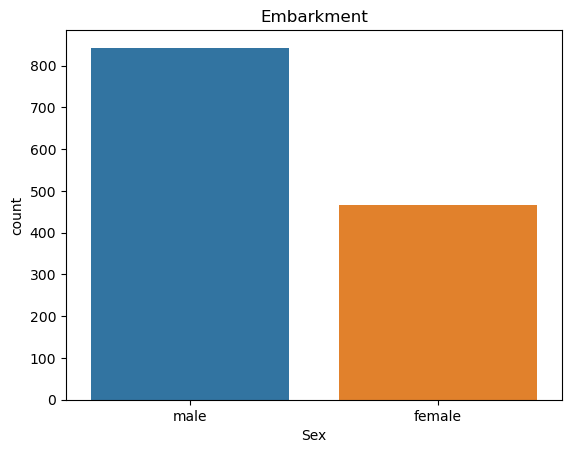

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=combined_df)
plt.title('Embarkment')
plt.show()

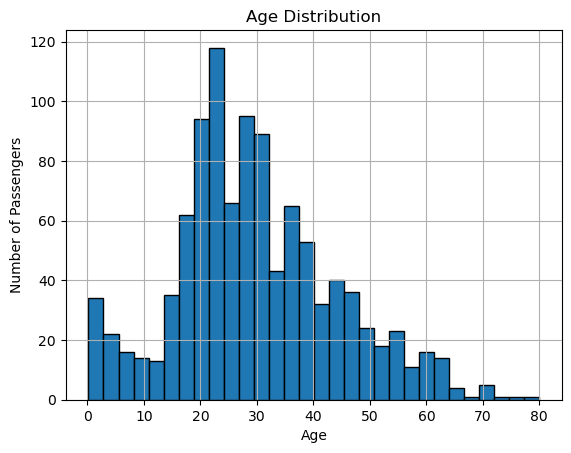

In [20]:
combined_df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

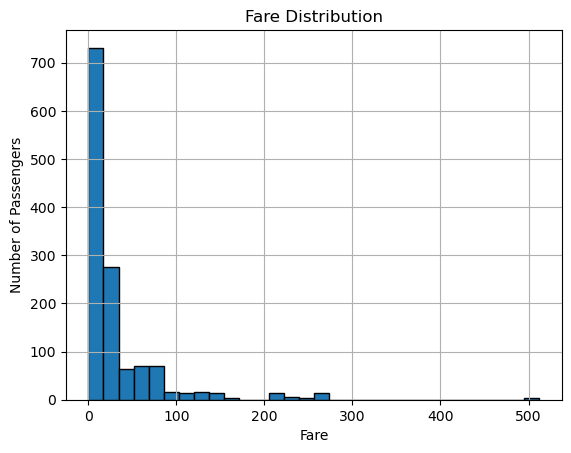

In [21]:
combined_df['Fare'].hist(bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

In [27]:
numeric_df = combined_df.select_dtypes(include='number')

In [28]:
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


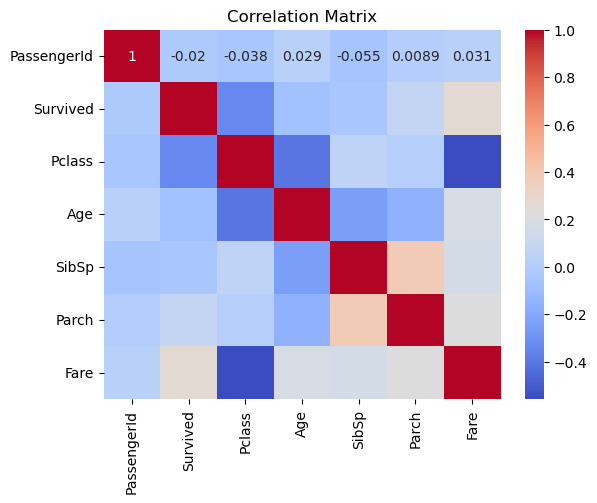

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = combined_df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()